# DOG VS. CAT Classification Using Transfer Learning

**Transfer Learning:** It is a deep learning technique where we use a pre-trained model. This pre-trained model is trained for one task and can be retrained for a similar task with a smaller dataset
<br>
Transfer Learning gives higher accuracy compared to training models from scratch
<br>
**Examples of Pre-Trained Models:**
- VGG-16 ( Famous for image recognition )
- ResNet50
- Inceptionv3
- MobileNet V2 ( In this project, i am going to use this model as it is lightweight)
- YOLO ( YOU ONLY LOOK ONCE { Object Detection } )

In [1]:
try:
    import kaggle
except Exception as e:
    print("Kaggle is not present")
    print("Downlading Kaggle")
    !pip install kaggle

In [2]:
import os

zip_path = "./data/dogs-vs-cats.zip"

# Check if the dataset zip already exists
if not os.path.exists(zip_path):
    print("Downloading Dataset")
    os.system("kaggle competitions download -c dogs-vs-cats -p ./data")
    print("Dataset downloaded from Kaggle")
else:
    print("Dataset already exists, skipping download.")

Dataset already exists, skipping download.


In [3]:
import zipfile

zip_path = "./data/dogs-vs-cats.zip"
extract_path = "./data/dogs-vs-cats"

# Check if files already extracted (e.g., by checking a subfolder or just the path)
if not os.path.exists(extract_path) or len(os.listdir(extract_path)) == 0:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("The dataset is extracted")
else:
    print("Dataset already exists, skipping extraction.")


Dataset already exists, skipping extraction.


In [4]:
test_zip = "./data/dogs-vs-cats/test1.zip"
test_extract = "./data/dogs-vs-cats/test1"

if os.path.exists(test_zip):
    if not os.path.exists(test_extract) or len(os.listdir(test_extract)) == 0:
        with zipfile.ZipFile(test_zip, 'r') as zip_ref:
            zip_ref.extractall(test_extract)
        print("Test dataset extracted.")
    else:
        print("Test dataset already extracted.")
else:
    print("Test dataset zip not found. Please download first.")

Test dataset already extracted.


In [5]:
# Paths
train_zip = "./data/dogs-vs-cats/train.zip"
train_extract = "./data/dogs-vs-cats/train"

# 2. Extract train.zip if not already extracted
if os.path.exists(train_zip):
    if not os.path.exists(train_extract) or len(os.listdir(train_extract)) == 0:
        with zipfile.ZipFile(train_zip, 'r') as zip_ref:
            zip_ref.extractall(train_extract)
        print("Train dataset extracted.")
    else:
        print("Train dataset already extracted.")
else:
    print("train.zip not found, please check Kaggle download.")

Train dataset already extracted.


In [6]:
# Counting the files in train folder
path, dirs, files = next(os.walk('data/dogs-vs-cats/train/train'))
file_count = len(files)
print("Number of images:",file_count)

Number of images: 25000


Printing the name of images

In [7]:
file_names = os.listdir('data/dogs-vs-cats/train/train')
# print(file_names)

In [8]:
# Importing the dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import random
import warnings 
warnings.filterwarnings('ignore')

In [9]:
# Setting the paths for train and test data
train_data_path = "data/dogs-vs-cats/train/train/"
test_data_path = "data/dogs-vs-cats/test1/test1/"

### Displaying the images of dogs and cats

Dimension of the img is :(375, 499, 3)


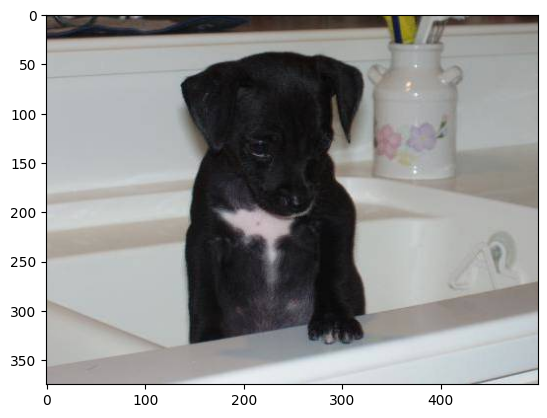

In [10]:
# Displaying the dog img
img = mpimg.imread('data/dogs-vs-cats/train/train/dog.8298.jpg')
plt.imshow(img)
print(f"Dimension of the img is :{img.shape}")

Dimension of the img is :(357, 400, 3)


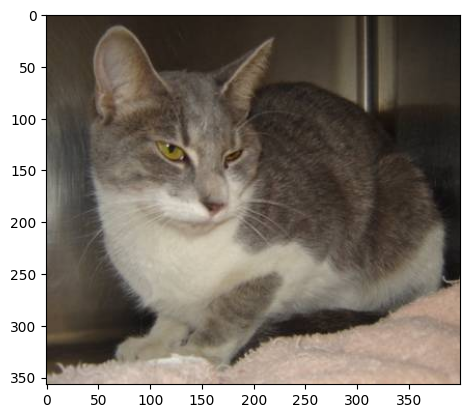

In [11]:
# Displaying the cat img
img_cat = mpimg.imread('data/dogs-vs-cats/train/train/cat.4352.jpg')
plt.imshow(img_cat)
print(f"Dimension of the img is :{img_cat.shape}")

Here we can see that all the img are of different size therfore we need to resize it before feeding this images to the model

In [12]:
# Resizing the images
dir_name = 'resized_img_train'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
    print(f"Directory named {dir_name} is created") 
else:
    print(f"Directory already present named {dir_name}")

# Counting the number of images of dog and cat

# Counter for dog and cat img
dog_counter = 0
cat_counter = 0

# Loop for counting the images
train_images = os.listdir(train_data_path)
for img in train_images:
    name = img[0:3]
    # print(name[0:3])

    if name == 'dog':
        dog_counter +=1
    else:
        cat_counter+=1

# Printing the number of images of dog and cat
print(f"Number of Dog images : {dog_counter}")
print(f"Number of Cat images : {cat_counter}")

Directory already present named resized_img_train
Number of Dog images : 12500
Number of Cat images : 12500


In [13]:
# Setting up the resized images dir
resized_img_path = "resized_img_train/"

In [14]:
# Taking the paths
original_folder = train_data_path
# resized_img_path
# Run resizing only if folder is empty
if len(os.listdir(resized_img_path)) == 0:
    print("Resized folder is empty. Starting resizing...")

    all_files = os.listdir(original_folder)
    random.shuffle(all_files) 
    # I am iterating it only for 2000 images
    for i in range(2000):
        file_name = all_files[i]   # ✅ call list once, not every loop
        img_path = original_folder+file_name   # ✅ safe path join

        img_for_resizing = Image.open(img_path)
        img_resized = img_for_resizing.resize((224,224))
        img_rgb = img_resized.convert('RGB')

        newImgPath = resized_img_path+file_name  # ✅ safe path join
        img_rgb.save(newImgPath)

    print("✅ Resizing completed for 2000 images")
else:
    print("Resized folder is not empty. Skipping resizing.")

Resized folder is not empty. Skipping resizing.


Dimension of the img is :(224, 224, 3)


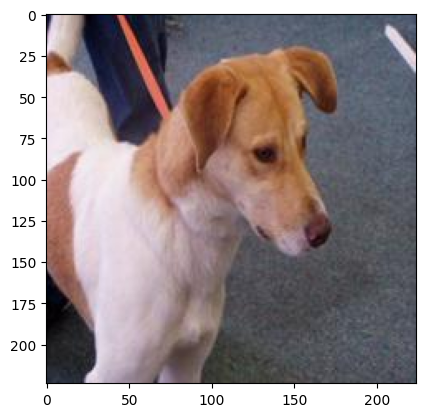

In [15]:
# Displaying the dog img
img = mpimg.imread('resized_img_train/dog.12462.jpg')
plt.imshow(img)
print(f"Dimension of the img is :{img.shape}")

Dimension of the img is :(224, 224, 3)


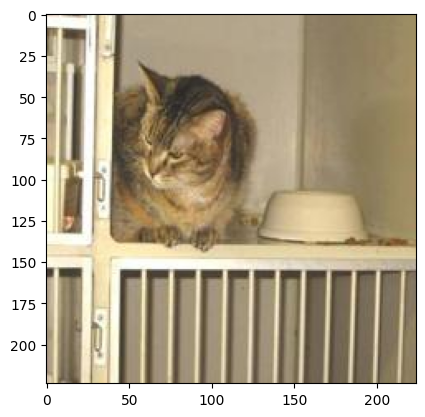

In [16]:
# Displaying the cat img
img_cat = mpimg.imread('resized_img_train/cat.1123.jpg')
plt.imshow(img_cat)
print(f"Dimension of the img is :{img_cat.shape}")

Cat -> 0 <br>
Dog -> 1

In [17]:
# Creating a for loop to assign labels
labels = []

resized_names = os.listdir(resized_img_path)

for i in range(2000):
    file_name = resized_names[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

print("The labels generated are: ")
print(labels)

The labels generated are: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
print(f"No of labels Generated are : {len(labels)}")

No of labels Generated are : 2000


In [19]:
# Counting the img of dogs and cats out of 2000 imgs
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1002  998]


In [20]:
# Converting img to np arrays
import cv2
import glob

In [21]:
# Set the path to the folder that contains resized images
image_directory = resized_img_path  

# Define the image file extensions we want to include
img_extension = ['png', 'jpg']  

# Create an empty list to store file paths
files = []  

# Loop over each extension and collect matching files from the folder
# glob.glob() finds all files in the directory matching the given pattern
[files.extend(glob.glob(image_directory + '*.' + e)) for e in img_extension]  

# Read each image using OpenCV (cv2.imread) and convert the list into a NumPy array
# This creates an array of all images for further processing (e.g., ML/DL models)
dog_cat_images = np.asarray([cv2.imread(file) for file in files])  

'''
Note I haven't implemented the batch processing inside it, so if the dataset is large 
Please implement the batch processing first or it may result in crash due to complete ram usage
'''

"\nNote I haven't implemented the batch processing inside it, so if the dataset is large \nPlease implement the batch processing first or it may result in crash due to complete ram usage\n"

In [22]:
print(dog_cat_images)

[[[[ 21  54  57]
   [ 19  52  55]
   [ 18  50  56]
   ...
   [ 16  29  37]
   [  7  19  31]
   [ 14  26  38]]

  [[ 18  51  54]
   [ 17  49  54]
   [ 15  47  53]
   ...
   [ 16  29  37]
   [ 12  24  34]
   [ 17  29  39]]

  [[ 15  47  52]
   [ 13  45  50]
   [ 12  44  50]
   ...
   [ 46  58  64]
   [ 43  55  61]
   [ 47  58  66]]

  ...

  [[106 169  46]
   [107 169  49]
   [107 168  50]
   ...
   [101 154  27]
   [100 154  23]
   [ 98 154  19]]

  [[104 166  46]
   [104 166  46]
   [105 166  48]
   ...
   [106 156  32]
   [102 153  26]
   [100 151  23]]

  [[101 163  43]
   [102 164  44]
   [103 164  48]
   ...
   [111 161  37]
   [108 158  34]
   [107 158  31]]]


 [[[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198 198]]

  [[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198 198]]

  [[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198

In [23]:
type(dog_cat_images)

numpy.ndarray

In [24]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [25]:
X = dog_cat_images 
y = np.asarray(labels)

In [26]:
print(X)
print(y)

[[[[ 21  54  57]
   [ 19  52  55]
   [ 18  50  56]
   ...
   [ 16  29  37]
   [  7  19  31]
   [ 14  26  38]]

  [[ 18  51  54]
   [ 17  49  54]
   [ 15  47  53]
   ...
   [ 16  29  37]
   [ 12  24  34]
   [ 17  29  39]]

  [[ 15  47  52]
   [ 13  45  50]
   [ 12  44  50]
   ...
   [ 46  58  64]
   [ 43  55  61]
   [ 47  58  66]]

  ...

  [[106 169  46]
   [107 169  49]
   [107 168  50]
   ...
   [101 154  27]
   [100 154  23]
   [ 98 154  19]]

  [[104 166  46]
   [104 166  46]
   [105 166  48]
   ...
   [106 156  32]
   [102 153  26]
   [100 151  23]]

  [[101 163  43]
   [102 164  44]
   [103 164  48]
   ...
   [111 161  37]
   [108 158  34]
   [107 158  31]]]


 [[[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198 198]]

  [[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198 198]]

  [[198 198 198]
   [198 198 198]
   [198 198 198]
   ...
   [198 198 198]
   [198 198 198]
   [198 198

### Train Test Split

In [27]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> Training Img
400 -> Test Img
<br>
**Note i haven't used the test data provied in the dataset i am creating my own dataset for testing if you want you can use the pre-given dataset for testing**

In [29]:
# Scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[0.92941176 0.98823529 0.95686275]
   [0.95294118 1.         0.98039216]
   [0.96862745 1.         0.98039216]
   ...
   [0.85490196 0.90980392 0.83921569]
   [0.81568627 0.89019608 0.82352941]
   [0.48627451 0.58039216 0.50980392]]

  [[0.83137255 0.90980392 0.8627451 ]
   [0.84313725 0.92156863 0.8745098 ]
   [0.85098039 0.91764706 0.8745098 ]
   ...
   [0.89803922 0.95294118 0.88235294]
   [0.79607843 0.87058824 0.80392157]
   [0.50196078 0.59607843 0.5254902 ]]

  [[0.58823529 0.71372549 0.64705882]
   [0.58039216 0.69411765 0.63137255]
   [0.58039216 0.68627451 0.62352941]
   ...
   [0.56078431 0.61568627 0.54509804]
   [0.54901961 0.62352941 0.55686275]
   [0.44705882 0.54117647 0.47058824]]

  ...

  [[0.6        0.50980392 0.19607843]
   [0.56862745 0.47843137 0.18039216]
   [0.5372549  0.45882353 0.18039216]
   ...
   [0.79607843 0.56470588 0.36862745]
   [0.76470588 0.53333333 0.35294118]
   [0.74509804 0.52156863 0.34509804]]

  [[0.64313725 0.55294118 0.23921569]
   [0.6

### Building the neural network 

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes = 2
# Creating the model
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [36]:
# Fitting the model / training the model
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 25s 358ms/step - loss: 0.2071 - accuracy: 0.9175
Epoch 2/5
50/50 [==============================] - 18s 363ms/step - loss: 0.0623 - accuracy: 0.9800
Epoch 3/5
50/50 [==============================] - 17s 329ms/step - loss: 0.0489 - accuracy: 0.9875
Epoch 4/5
50/50 [==============================] - 17s 330ms/step - loss: 0.0352 - accuracy: 0.9906
Epoch 5/5
50/50 [==============================] - 18s 359ms/step - loss: 0.0291 - accuracy: 0.9912


In [38]:
# Evaluating the model
score , acc = model.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Test Loss : {score}")
print(f"Test Accuracy : {acc}")

Test Loss : 0.05556648597121239
Test Accuracy : 0.9725000262260437


## Predictive System

In [ ]:
input_image_path = input("Enter the path of the image : ")
input_image = cv2.imread(input_image_path)
# cv2.imshow("Input Image",input_image)
# cv2.waitKey(0)
input_image_resized = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resized/255    
input_image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
# print(input_image_reshaped.shape)
# print(input_image_reshaped)

## Predictive System
pred = model.predict(input_image_reshaped)
print(pred)
print(np.argmax(pred))
if np.argmax(pred) == 0:
    print("It's a Cat")
else:
    print("It's a Dog")

(1, 224, 224, 3)
[[[[0.09803922 0.10588235 0.24313725]
   [0.09803922 0.10588235 0.24313725]
   [0.09411765 0.10588235 0.24313725]
   ...
   [0.14117647 0.2        0.35686275]
   [0.2        0.27843137 0.45098039]
   [0.22745098 0.31764706 0.50588235]]

  [[0.1254902  0.12941176 0.26666667]
   [0.11764706 0.12156863 0.2627451 ]
   [0.11372549 0.11764706 0.25882353]
   ...
   [0.14509804 0.2        0.36862745]
   [0.17647059 0.25098039 0.43137255]
   [0.18823529 0.27843137 0.47058824]]

  [[0.13333333 0.1254902  0.26666667]
   [0.1254902  0.12156863 0.2627451 ]
   [0.10588235 0.10588235 0.24705882]
   ...
   [0.1254902  0.17647059 0.35294118]
   [0.14509804 0.21960784 0.40392157]
   [0.15294118 0.24313725 0.43529412]]

  ...

  [[0.65490196 0.81176471 0.9254902 ]
   [0.61960784 0.76862745 0.90980392]
   [0.62352941 0.76078431 0.92941176]
   ...
   [0.16078431 0.15294118 0.25490196]
   [0.16862745 0.16078431 0.2627451 ]
   [0.16078431 0.15686275 0.2627451 ]]

  [[0.66666667 0.81568627 0.